# Neural Networks

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

import random
random.seed(17)

## Load & Analyze Dataset
- The *Fashion MNIST* dataset is a drop-in replacement for MNIST
    - Classic dataset of 0-9 handwritten digits
- The fashion dataset contains zalando images
    - 60k training, 10k test
    - 28x28 grayscale images
    - 10 classes

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print('Dataset type:', type(train_images))
print('Training shape:', train_images.shape)
print('Testing shape:', test_images.shape)

Dataset type: <class 'numpy.ndarray'>
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [3]:
print('Instances per class')
np.unique(train_labels, return_counts=True)

Instances per class


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [4]:
CLASS_NAMES = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

## Preview Images


### 16 Random Images

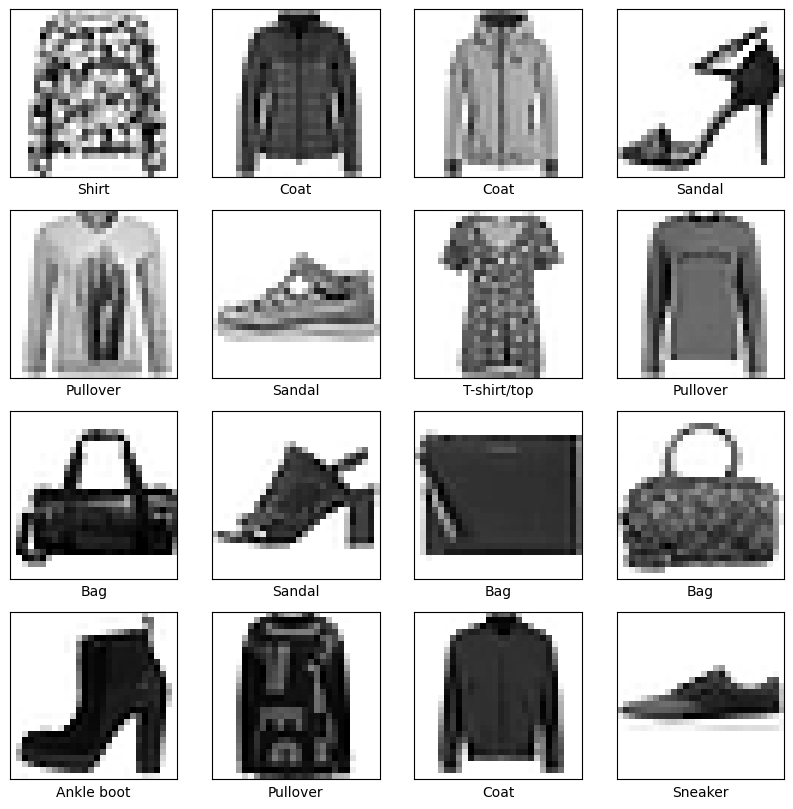

In [5]:
# get 16 random images
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 16)

# display on 4x4 grid
plt.figure(figsize=(10,10))
for i in range(len(sampler)):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[sampler[i]], cmap=plt.cm.binary)
    plt.xlabel(CLASS_NAMES[train_labels[sampler[i]]])
plt.show()


### Single Image

Class Name: Pullover


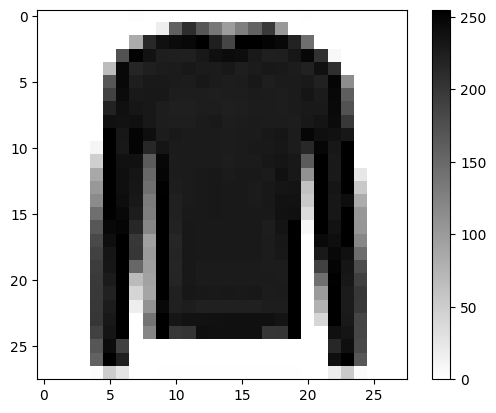

In [6]:
random_image_id = 15000
print('Class Name:', CLASS_NAMES[train_labels[random_image_id]])
plt.figure()
plt.imshow(train_images[random_image_id],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Neural Network
- Each pixel in a grayscale image ranges from 0-255
    - 0 is black
    - 255 is white
- We want to use min-max scaling to adjust the range from 0-1
- We also want to flatten the grid of numbers into a single row
    - We take the grid row by row and append to our flattened row
    - Result is a long vector of 28x28 = 784 values


### Train/Test Split

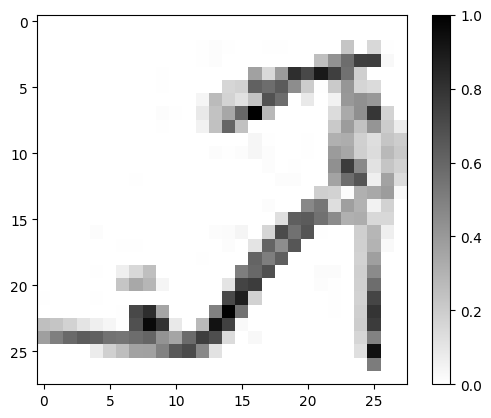

In [7]:
# split dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# view sample training image
plt.figure()
plt.imshow(train_images[8], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## Neural Network Model
### Design Model
- Our input layer is 28x28 grid of values
    - We want to flatten it into a single vector
    - This results in vector with 28x28 = 784 pixel values
- We have 2 hidden layers
    - 128 nodes
    - 64 nodes
- Resulting output layer is 10 nodes
    - Each node corresponds to a class
    - Node with the highest probability score is the selected classification
- General training process
    - Take a batch of images and their labels
    - Forward pass through network
    - Calculate loss of the network batch
    - Update the weights of the NN


In [8]:
# build
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
])

# compile
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Hyperparameters
- The loss function determine the quantity that will be minimized during training

| Problem Type                                                       | Activation | LossFunction                   |
| ------------------------------------------------------------------ | ---------- | ------------------------------ |
| binary classification                                              | sigmoid    | binary crossentropy            |
| multi-class, single-label classification (integer labels)          | softmax    | SparseCategorical crossentropy |
| multi-class, single-label classification (one-hot encoding labels) | softmax    | Categorical crossentropy       |
| regression to arbitrary                                            | none       | MSE                            |
| regression to values 0-1                                           | sigmoid    | MSE or binary crossentropy     |

- Gradient descent
    - Gradient descent finds the direction in order to minimize loss
    - Uses advanced calculus
    - TensorFlow helps optimize all this math
- Optimizers
    - Optimizers determine how the model is updated based on loss function
    - Uses a variant of stochastic gradient descent (SGD)

### Train Model

In [9]:
# train
model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_split=0.1
);

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7621 - loss: 0.6938 - val_accuracy: 0.8532 - val_loss: 0.4176
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8609 - loss: 0.3911 - val_accuracy: 0.8680 - val_loss: 0.3637
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8707 - loss: 0.3520 - val_accuracy: 0.8767 - val_loss: 0.3355
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8843 - loss: 0.3159 - val_accuracy: 0.8818 - val_loss: 0.3271
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8909 - loss: 0.2990 - val_accuracy: 0.8797 - val_loss: 0.3325
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8984 - loss: 0.2792 - val_accuracy: 0.8763 - val_loss: 0.3448
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8991 - loss: 0.2737 - val_accuracy: 0.8780 - val_loss: 0.3471
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9023 - loss: 0.2610 - val_accuracy: 0.

### Make Predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


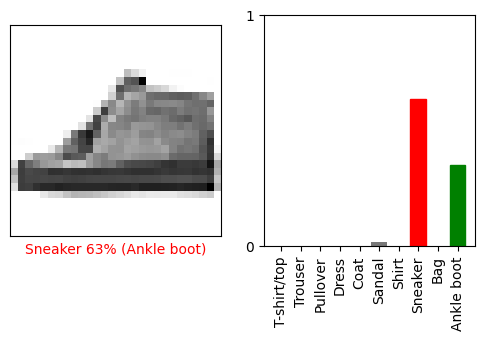

In [10]:
image_id = 107 # Pick an image id between 0 and 9999 inclusive

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f'{CLASS_NAMES[predicted_label]} {100*np.max(predictions_array):2.0f}% ({CLASS_NAMES[true_label]})', color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks(range(10))
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_id, predictions[image_id], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_id, predictions[image_id],  test_labels)
_ = plt.xticks(range(10), CLASS_NAMES, rotation=90)
plt.show()